# Лабораторная работа №2

## Описание датасета

Данные этого датасета являются информацией о купленных вместе товарах.

Общая характеристика:

- Датасет содержит данные о покупках в продуктовом магазине

- Данные представлены в формате рыночной корзины

- Каждая строка соответствует одной транзакции

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import networkx as nx

SUPPORT = 0.07
THRESHOLD = 0.27

#Загрузка данных
all_data = pd.read_csv('data/data.csv', on_bad_lines='skip')
print(all_data)

       Lassi  Coffee Powder         Butter        Yougurt    Ghee Cheese  \
0       Ghee  Coffee Powder            NaN            NaN     NaN    NaN   
1      Lassi     Tea Powder         Butter         Cheese     NaN    NaN   
2     Cheese     Tea Powder         Panner  Coffee Powder  Butter  Bread   
3     Cheese        Yougurt  Coffee Powder          Sugar  Butter  Sweet   
4      Sugar     Tea Powder           Ghee          Sweet  Panner   Milk   
...      ...            ...            ...            ...     ...    ...   
8726  Panner          Sugar          Bread           Milk  Cheese    NaN   
8727   Sugar          Bread  Coffee Powder         Cheese     NaN    NaN   
8728   Bread         Cheese        Yougurt           Milk     NaN    NaN   
8729    Ghee          Bread        Yougurt          Sugar  Cheese    NaN   
8730  Panner        Yougurt          Bread            NaN     NaN    NaN   

      Unnamed: 6  
0            NaN  
1            NaN  
2            NaN  
3          

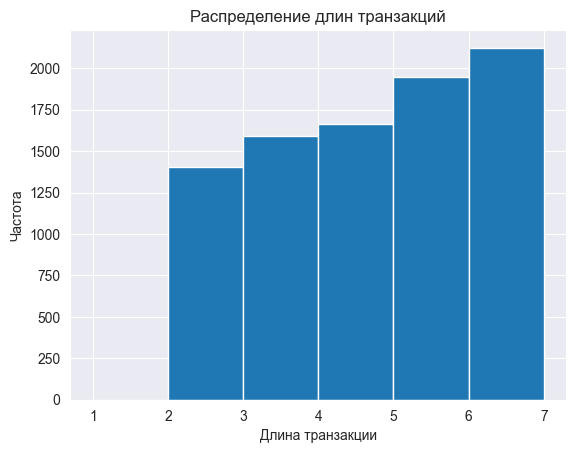

In [3]:
#Анализ транзакций
transaction_lengths = all_data.notnull().sum(axis=1)
plt.hist(transaction_lengths, bins=range(1, max(transaction_lengths) + 2))
plt.xlabel('Длина транзакции')
plt.ylabel('Частота')
plt.title('Распределение длин транзакций')
plt.show()

In [4]:
#Очистка данных
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in np_data]

#Список уникальных товаров
unique_items = set()
for row in np_data:
    for elem in row:
        unique_items.add(elem)
print(unique_items)

te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

{'Bread', 'Lassi', 'Panner', 'Tea Powder', 'Yougurt', 'Butter', 'Sugar', 'Milk', 'Ghee', 'Cheese', 'Coffee Powder', 'Sweet'}


Список уникальных продуктов

In [5]:
# Алгоритм Apriori
df1 = apriori(data, min_support=SUPPORT, use_colnames = True)
print(df1)
rules = association_rules(df1, metric = "confidence", min_threshold=THRESHOLD)
rules

     support                  itemsets
0   0.268583                   (Bread)
1   0.264002                  (Butter)
2   0.271561                  (Cheese)
3   0.269729           (Coffee Powder)
4   0.274654                    (Ghee)
5   0.261711                   (Lassi)
6   0.271332                    (Milk)
7   0.263429                  (Panner)
8   0.262856                   (Sugar)
9   0.267209                   (Sweet)
10  0.259993              (Tea Powder)
11  0.270988                 (Yougurt)
12  0.070782           (Bread, Cheese)
13  0.071355    (Bread, Coffee Powder)
14  0.071813           (Bread, Panner)
15  0.070553          (Bread, Yougurt)
16  0.072386            (Ghee, Butter)
17  0.070324         (Yougurt, Butter)
18  0.070210   (Cheese, Coffee Powder)
19  0.071469            (Ghee, Cheese)
20  0.071469            (Milk, Cheese)
21  0.071928           (Cheese, Sweet)
22  0.072271         (Yougurt, Cheese)
23  0.075707     (Ghee, Coffee Powder)
24  0.070439     (Milk, C

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Panner),(Bread),0.263429,0.268583,0.071813,0.272609,1.014988,1.0,0.001060,1.005534,0.020048,0.156048,0.005504,0.269993
1,(Butter),(Ghee),0.264002,0.274654,0.072386,0.274187,0.998300,1.0,-0.000123,0.999357,-0.002309,0.155244,-0.000644,0.268870
2,(Ghee),(Coffee Powder),0.274654,0.269729,0.075707,0.275646,1.021940,1.0,0.001625,1.008170,0.029598,0.161535,0.008104,0.278163
3,(Coffee Powder),(Ghee),0.269729,0.274654,0.075707,0.280679,1.021940,1.0,0.001625,1.008377,0.029398,0.161535,0.008308,0.278163
4,(Yougurt),(Coffee Powder),0.270988,0.269729,0.074218,0.273880,1.015391,1.0,0.001125,1.005717,0.020792,0.159096,0.005685,0.274520
5,(Coffee Powder),(Yougurt),0.269729,0.270988,0.074218,0.275159,1.015391,1.0,0.001125,1.005754,0.020756,0.159096,0.005721,0.274520
6,(Sweet),(Ghee),0.267209,0.274654,0.072958,0.273039,0.994122,1.0,-0.000431,0.997779,-0.008005,0.155594,-0.002226,0.269339
7,(Lassi),(Sweet),0.261711,0.267209,0.070782,0.270460,1.012165,1.0,0.000851,1.004456,0.016280,0.154500,0.004436,0.267677
8,(Panner),(Sweet),0.263429,0.267209,0.071469,0.271304,1.015327,1.0,0.001079,1.005620,0.020495,0.155650,0.005589,0.269386


Качество данных: Большинство правил имеют низкую достоверность (~27%), что означает, что даже "лучшие" правила срабатывают только в каждом четвертом случае.

Алгоритм выдал несколько очевидно бесполезных правил (например, Butter -> Ghee), которые лишь подтверждают независимость популярных товаров.

Наиболее значимое правило — это взаимосвязь между Coffee Powder и Ghee. Тем не менее слабый лифт (1.02) не позволяет назвать это правило нетривиальным.

Набор правил в целом слабый. Нет ни одного правила с высокой достоверностью (>50%) и сильным лифтом (>1.5).

In [6]:
df11 = apriori(data, min_support=SUPPORT + 0.01, use_colnames = True)
print(df11)
rules1 = association_rules(df11, metric = "confidence", min_threshold=THRESHOLD + 0.01)
rules1

     support         itemsets
0   0.268583          (Bread)
1   0.264002         (Butter)
2   0.271561         (Cheese)
3   0.269729  (Coffee Powder)
4   0.274654           (Ghee)
5   0.261711          (Lassi)
6   0.271332           (Milk)
7   0.263429         (Panner)
8   0.262856          (Sugar)
9   0.267209          (Sweet)
10  0.259993     (Tea Powder)
11  0.270988        (Yougurt)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


Если увеличить поддержку и достоверность хотя бы на 0.01, то никакие правила не появятся

In [7]:
df12 = apriori(data, min_support=SUPPORT - 0.01, use_colnames = True)
print(df12)
rules2 = association_rules(df12, metric = "confidence", min_threshold=THRESHOLD - 0.01)
rules2

     support               itemsets
0   0.268583                (Bread)
1   0.264002               (Butter)
2   0.271561               (Cheese)
3   0.269729        (Coffee Powder)
4   0.274654                 (Ghee)
..       ...                    ...
73  0.066659    (Tea Powder, Sugar)
74  0.068263       (Yougurt, Sugar)
75  0.068263    (Tea Powder, Sweet)
76  0.066774       (Yougurt, Sweet)
77  0.068606  (Yougurt, Tea Powder)

[78 rows x 2 columns]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Butter),(Bread),0.264002,0.268583,0.068950,0.261171,0.972404,1.0,-0.001957,0.989968,-0.037127,0.148715,-0.010134,0.258944
1,(Bread),(Cheese),0.268583,0.271561,0.070782,0.263539,0.970461,1.0,-0.002154,0.989108,-0.039953,0.150805,-0.011012,0.262094
2,(Cheese),(Bread),0.271561,0.268583,0.070782,0.260650,0.970461,1.0,-0.002154,0.989269,-0.040109,0.150805,-0.010847,0.262094
3,(Bread),(Coffee Powder),0.268583,0.269729,0.071355,0.265672,0.984959,1.0,-0.001090,0.994475,-0.020451,0.152808,-0.005555,0.265108
4,(Coffee Powder),(Bread),0.269729,0.268583,0.071355,0.264544,0.984959,1.0,-0.001090,0.994507,-0.020482,0.152808,-0.005523,0.265108
5,(Bread),(Panner),0.268583,0.263429,0.071813,0.267377,1.014988,1.0,0.001060,1.005389,0.020189,0.156048,0.005360,0.269993
6,(Panner),(Bread),0.263429,0.268583,0.071813,0.272609,1.014988,1.0,0.001060,1.005534,0.020048,0.156048,0.005504,0.269993
7,(Bread),(Yougurt),0.268583,0.270988,0.070553,0.262687,0.969365,1.0,-0.002230,0.988740,-0.041419,0.150427,-0.011388,0.261521
8,(Yougurt),(Bread),0.270988,0.268583,0.070553,0.260355,0.969365,1.0,-0.002230,0.988876,-0.041550,0.150427,-0.011250,0.261521
9,(Ghee),(Butter),0.274654,0.264002,0.072386,0.263553,0.998300,1.0,-0.000123,0.999390,-0.002343,0.155244,-0.000610,0.268870


Аналогично если уменьшить параметры, то количество правил увеличится, но качество нового правила хуже предыдущих

In [8]:
#Алгоритм FPG
df1 = fpgrowth(data, min_support=SUPPORT, use_colnames = True)
print(df1)
rules = association_rules(df1, metric = "confidence", min_threshold=THRESHOLD)
rules

     support                  itemsets
0   0.269729           (Coffee Powder)
1   0.271561                  (Cheese)
2   0.264002                  (Butter)
3   0.259993              (Tea Powder)
4   0.268583                   (Bread)
5   0.263429                  (Panner)
6   0.270988                 (Yougurt)
7   0.267209                   (Sweet)
8   0.262856                   (Sugar)
9   0.274654                    (Ghee)
10  0.271332                    (Milk)
11  0.261711                   (Lassi)
12  0.074218  (Yougurt, Coffee Powder)
13  0.075707     (Ghee, Coffee Powder)
14  0.070210   (Cheese, Coffee Powder)
15  0.070439     (Milk, Coffee Powder)
16  0.071469            (Ghee, Cheese)
17  0.070324         (Yougurt, Butter)
18  0.072386            (Ghee, Butter)
19  0.071355    (Bread, Coffee Powder)
20  0.070782           (Bread, Cheese)
21  0.070553          (Bread, Yougurt)
22  0.071813           (Bread, Panner)
23  0.071469           (Panner, Sweet)
24  0.072271         (You

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Yougurt),(Coffee Powder),0.270988,0.269729,0.074218,0.273880,1.015391,1.0,0.001125,1.005717,0.020792,0.159096,0.005685,0.274520
1,(Coffee Powder),(Yougurt),0.269729,0.270988,0.074218,0.275159,1.015391,1.0,0.001125,1.005754,0.020756,0.159096,0.005721,0.274520
2,(Ghee),(Coffee Powder),0.274654,0.269729,0.075707,0.275646,1.021940,1.0,0.001625,1.008170,0.029598,0.161535,0.008104,0.278163
3,(Coffee Powder),(Ghee),0.269729,0.274654,0.075707,0.280679,1.021940,1.0,0.001625,1.008377,0.029398,0.161535,0.008308,0.278163
4,(Butter),(Ghee),0.264002,0.274654,0.072386,0.274187,0.998300,1.0,-0.000123,0.999357,-0.002309,0.155244,-0.000644,0.268870
5,(Panner),(Bread),0.263429,0.268583,0.071813,0.272609,1.014988,1.0,0.001060,1.005534,0.020048,0.156048,0.005504,0.269993
6,(Panner),(Sweet),0.263429,0.267209,0.071469,0.271304,1.015327,1.0,0.001079,1.005620,0.020495,0.155650,0.005589,0.269386
7,(Sweet),(Ghee),0.267209,0.274654,0.072958,0.273039,0.994122,1.0,-0.000431,0.997779,-0.008005,0.155594,-0.002226,0.269339
8,(Lassi),(Sweet),0.261711,0.267209,0.070782,0.270460,1.012165,1.0,0.000851,1.004456,0.016280,0.154500,0.004436,0.267677


FPG корректно посчитал точно такие же правила, как и Apriori

In [14]:
target = 2
count = -1
for i in range(1, 10):
    s = i / 100
    df11 = fpgrowth(data, min_support=s, use_colnames = True)
    rules1 = association_rules(df11, metric = "confidence", min_threshold=THRESHOLD)

    new_count = len(list(filter(lambda x: len(list(x)) == target, list(rules['antecedents']))))\

    if count >= new_count:
        print(f'Искомое значение support: {s - 0.01}')
        df12 = fpgrowth(data, min_support=s - 0.01, use_colnames = True)
        rules2 = association_rules(df12, metric = "confidence", min_threshold=THRESHOLD)
        print(rules2)
        break
    else:
        count = new_count


Искомое значение support: 0.01
                antecedents      consequents  antecedent support  \
0                 (Yougurt)  (Coffee Powder)            0.270988   
1           (Coffee Powder)        (Yougurt)            0.269729   
2                    (Ghee)  (Coffee Powder)            0.274654   
3           (Coffee Powder)           (Ghee)            0.269729   
4           (Ghee, Yougurt)  (Coffee Powder)            0.070095   
5           (Yougurt, Milk)  (Coffee Powder)            0.067575   
6                  (Butter)           (Ghee)            0.264002   
7            (Ghee, Butter)  (Coffee Powder)            0.072386   
8   (Butter, Coffee Powder)           (Ghee)            0.066888   
9      (Panner, Tea Powder)          (Sweet)            0.066774   
10                 (Panner)          (Bread)            0.263429   
11                 (Panner)          (Sweet)            0.263429   
12           (Bread, Sweet)         (Panner)            0.068950   
13               

Алгоритм находит правила из n объектов. В данном случае с support = 0.01 были найдены правила из 3 объектов
- (Ghee, Yougurt) ->  (Coffee Powder)
- (Yougurt, Milk) -> (Coffee Powder)
- (Ghee, Butter) ->  (Coffee Powder)
- (Butter, Coffee Powder) -> (Ghee)
- (Panner, Tea Powder) -> (Sweet)
- (Bread, Sweet) -> (Panner)
- (Lassi, Milk) -> (Panner)
(Lassi, Panner) -> (Milk)
- (Milk, Panner) -> (Lassi)
- (Lassi, Cheese) -> (Sweet)

Однако значения показателей этих правил достаточно небольшие

     support       itemsets
9   0.274654           Ghee
1   0.271561         Cheese
10  0.271332           Milk
6   0.270988        Yougurt
0   0.269729  Coffee Powder
4   0.268583          Bread
7   0.267209          Sweet
2   0.264002         Butter
5   0.263429         Panner
8   0.262856          Sugar


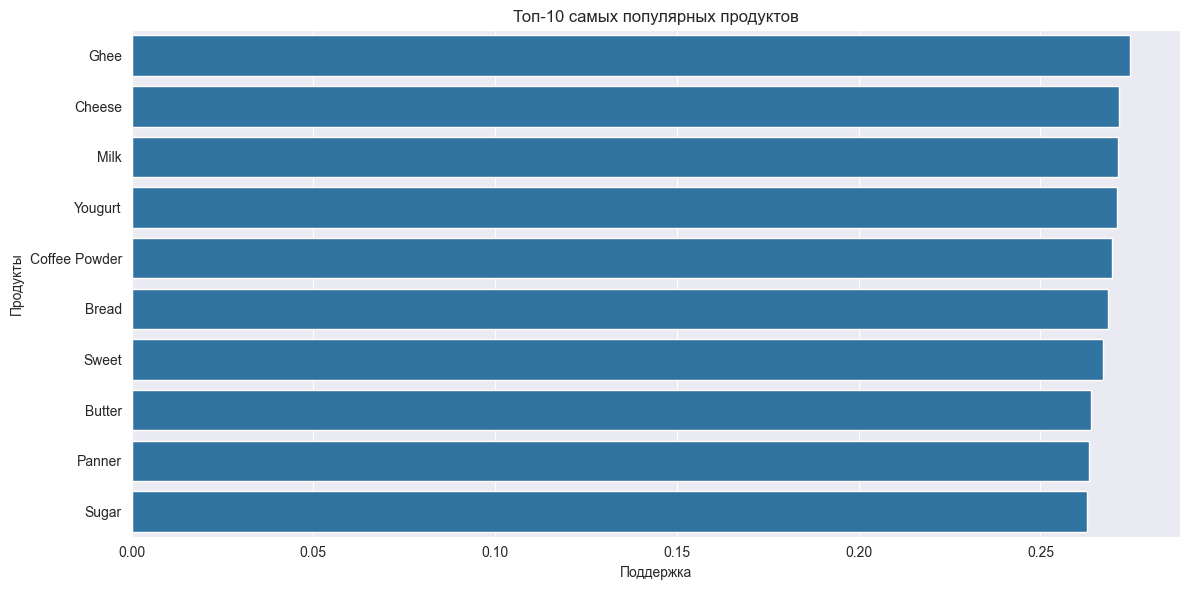

In [10]:
#Поддержка
df1['itemsets'] = df1['itemsets'].apply(lambda x: ', '.join(list(x)))
top_products = df1.sort_values(by='support', ascending=False).head(10)
print(top_products)
plt.figure(figsize=(12, 6))
sns.barplot(x='support', y='itemsets', data=top_products)
plt.title('Топ-10 самых популярных продуктов')
plt.xlabel('Поддержка')
plt.ylabel('Продукты')
plt.tight_layout()
plt.show()
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

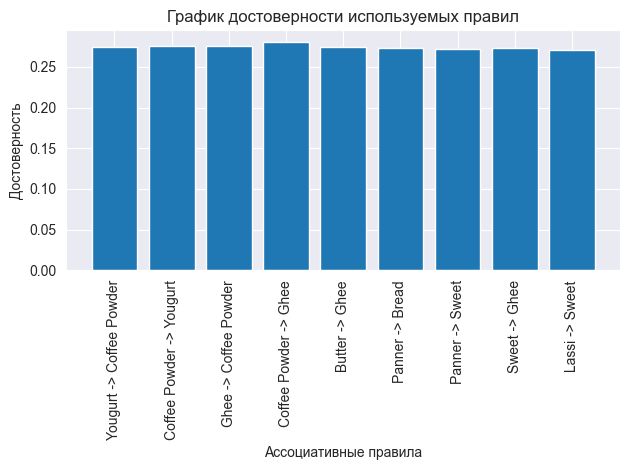

In [11]:
#График достоверности используемых правил
products_1 = rules["antecedents"].tolist()
products_2 = rules["consequents"].tolist()
confidence = rules["confidence"].tolist()
rules_labels = [f"{product1} -> {product2}" for product1, product2 in zip(products_1, products_2)]
plt.bar(rules_labels, confidence)
plt.xlabel("Ассоциативные правила")
plt.ylabel("Достоверность")
plt.title("График достоверности используемых правил")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\Hierarchy\AppData\Local\Temp\ipykernel_25736\143454046.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


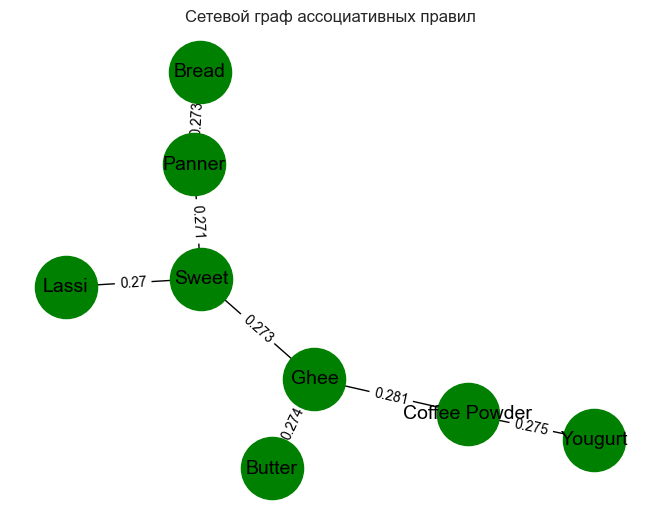

In [12]:
#Визуализация ассоциативных правил в виде графа
G = nx.Graph()
for product in rules["antecedents"]:
    G.add_node(product)
for product in rules["consequents"]:
    G.add_node(product)
for index, row in rules.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['confidence'])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='green', font_size=14)
# edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {(u, v): f"{round(d['weight'], 3)}" for u, v, d in G.edges(data=True)}

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Сетевой граф ассоциативных правил')
plt.tight_layout()
plt.show()

По графу можем определить центральные узлы - Sweet и Ghee. Все остальные скорее периферийные связи.

Покупатели кофе часто также берут топленое масло и кофе. Это может указывать на утренние ритуалы покупок.

Товары из одной категории (молочные) имеют перекрестные связи, но не очень сильные. (Butter → Ghee (0.274), Panner → Bread (0.273)).

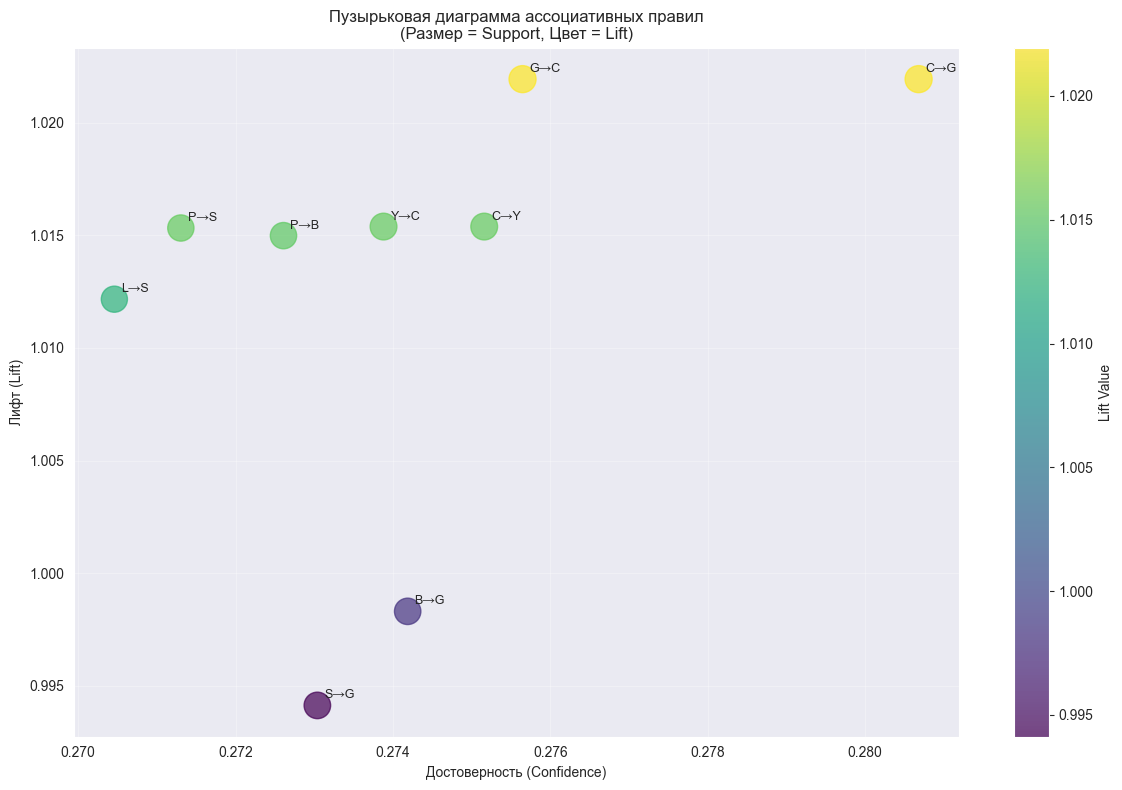

In [13]:
plt.figure(figsize=(12, 8))

scatter = plt.scatter(
    rules['confidence'],
    rules['lift'],
    s=rules['support']*5000,
    c=rules['lift'],
    cmap='viridis',
    alpha=0.7
)

for i, rule in rules.iterrows():
    label = f"{list(rule['antecedents'])[0]}→{list(rule['consequents'])[0]}"
    plt.annotate(label,
                (rule['confidence'], rule['lift']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9)

plt.colorbar(scatter, label='Lift Value')
plt.xlabel('Достоверность (Confidence)')
plt.ylabel('Лифт (Lift)')
plt.title('Пузырьковая диаграмма ассоциативных правил\n(Размер = Support, Цвет = Lift)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Заключение

### Общая характеристика набора правил
Качество правил в целом низкое. Все показатели находятся в узком диапазоне:

- Support: 0.070-0.076 (7.0-7.6% транзакций)
- Confidence: 0.270-0.281 (27.0-28.1%)
- Lift: 0.994-1.022 (почти нейтральные связи)

Это указывает на слабые и невыразительные ассоциации в данных.

### Классификация правил по силе связи
Слабоположительные связи (Lift > 1.01):
- Coffee Powder <-> Ghee (Lift = 1.022) - самая сильная связь
- Coffee Powder <-> Yougurt (Lift = 1.015)
- Panner -> Sweet (Lift = 1.015)
- Lassi -> Sweet (Lift = 1.012)

Нейтральные связи (Lift ≈ 1.00):
- Panner -> Bread (Lift = 1.015) - пограничный случай
- Butter -> Ghee (Lift = 0.998) - практически независимы

Отрицательные связи (Lift < 1.00):
- Sweet -> Ghee (Lift = 0.994) - очень слабая отрицательная связь

Набор правил слабый, но информативный. Лучшее правило Coffee Powder <-> Ghee имеет lift всего 1.022, что означает увеличение вероятности покупки всего на 2.2%.